In [17]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Conv2D
from tensorflow.keras.models import Model 

In [21]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()


In [22]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [23]:
import matplotlib.pyplot as plt

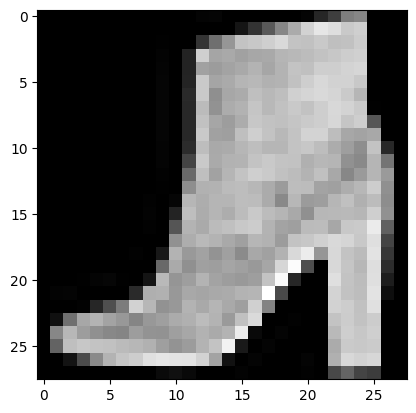

In [24]:
plt.imshow(X_train[1299], cmap='gray')

In [25]:
X_train, X_test = X_train/255.0, X_test/255.0

In [26]:
X_train.shape

(60000, 28, 28)

In [27]:
#convolution expects height X width X color 
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [28]:
X_train.shape

(60000, 28, 28, 1)

In [30]:
#no of classes
K = len(set(y_train))
print("No of classes:", K)

No of classes: 10


In [38]:
#building the model using functional API
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(.2)(x)
x= Dense(512, activation='relu')(x)
x=Dropout(.2)(x)
x = Dense(K, activation='softmax')(x)
model = Model(i, x)

In [39]:
i, x

(<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_5')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_1')>)

In [40]:
model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy', 
             metrics=['accuracy'])

In [41]:
r = model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5


2023-10-07 17:35:07.394903: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 27s 14ms/step - loss: 0.5246 - accuracy: 0.8062 - val_loss: 0.3977 - val_accuracy: 0.8517
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3591 - accuracy: 0.8649 - val_loss: 0.3594 - val_accuracy: 0.8658
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3127 - accuracy: 0.8820 - val_loss: 0.3160 - val_accuracy: 0.8855
Epoch 4/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2810 - accuracy: 0.8945 - val_loss: 0.3135 - val_accuracy: 0.8825
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2535 - accuracy: 0.9041 - val_loss: 0.3079 - val_accuracy: 0.8859
